# Unsupervised Learning: K-Means Python Workshop for IoT Data

Previously, we took a look at how to use supervised ML algorithms such as linear regression, logistic regression, K-Nearest Neighbors, Decision Trees, etc. to perform classification/regression tasks on specifically targeted columns from our data. Using the selected feature columns, we could train a model to make predictions about the target value/category of a new data point.

On the other hand, unsupervised learning algorithms aim to detect the underlying patterns/relationships/structures from raw, unlabelled data without a predetermined target variable. This makes unsupervised learning techniques very useful in conducting exploratory data analysis (EDA), pattern + anomaly detection, and understanding feature correlations from unannotated datasets. In this notebook, we want to explore unsupervised learning applications further and learn how they can be used to provide valuable insights on more complex dataset structures.

In short, here are some of the key differences to note between working with Supervised and Unsupervised Learning algorithms:

| Supervised | Unsupervised |
|:--------:|:--------:|
|  Input: Learns by taking in a set of features, paired with its corresponding target output   |  Input: Learns by discovering patterns in the data without predefined target output    |
|  Goal: Well-suited for predictive tasks, where you want to map an input to a target output   |  Goal: More suited for exploratory analysis, where you want to gain insight on the structure of the data   |
|  Application: Classification and Regression   |  Application: Clustering/Pattern Discovery and Dimensionality Reduction  |

Some of the most commonly used Unsupervised ML algorithms are:
- K-means Clustering
- DBSCAN
- Hierarchical Clustering
- Principal Component Analysis (PCA)

In specific, we would like to take a deeper look at K-Means Clustering today!

### K-means Clustering? What is that?

Clustering is an important technique to learn in data analysis, as most of the data you come across in the future will be unlabelled and/or have a very complex structure. Clustering is a very intuitive, unsupervised learning approach that groups data points into distinct "clusters", based on the similarities of their input features (only numerical). In doing so, we are able to gain insight on how the features relate to one another, despite not having a set target.

More specifically, this is how the K-means Clustering algorithm functions:

1. Chooses the number of clusters (k): The first step is to determine how many distinct clusters we want to represent our data. This value is represented by the parameter 'k'.
2. Initializes centroids (centre of clusters): Centroids refer to the centre of each cluster. Randomly select k data points from the dataset to act as our initial centroids.
3. Assigns data points: Each new data point is plotted and its distance from each centroid is calculated. The new data point is assigned to the cluster with the centroid that is closest. 
4. Updates centroid location: After all data points have been assigned to their respective clusters, the mean value of the data points within each cluster are calculated. Then, each respective centroid is updated to these mean values.
5. Repeats steps 3-4: Steps 3 and 4 and repeated until the max iterations are reached and the final result is yielded!

How can we apply this to an interesting, IoT related dataset?

In [240]:
# Loading in some basic Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### What dataset will we be using, exactly?

This dataset aims to study the impact of energy consumption on a city in Morocco. The distribution network is covered by 3 distinct regions: Quads, Smir and Boussafou. 

There are 52416 entries in this dataset and each entry into the dataset consists of 9 columns:
- Temperature
- Humidity
- Wind Speed
- General Diffuse Flows
- Diffuse Flows
- Zone 1 Power Consumption
- Zone 2 Power Consumption
- Zone 3 Power Consumption

If you would like to read more about this dataset and access it for yourself, you can do so through this link: https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption

In [241]:
# Reading the csv dataset into our Python environment
df = pd.read_csv('powerconsumption.csv', index_col=['Datetime'])
df.head() # Only first few rows of data for viewing clarity

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [242]:
# Concise Dataset Summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 52416 entries, 1/1/2017 0:00 to 12/30/2017 23:50
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float64
 1   Humidity                52416 non-null  float64
 2   WindSpeed               52416 non-null  float64
 3   GeneralDiffuseFlows     52416 non-null  float64
 4   DiffuseFlows            52416 non-null  float64
 5   PowerConsumption_Zone1  52416 non-null  float64
 6   PowerConsumption_Zone2  52416 non-null  float64
 7   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8)
memory usage: 3.6+ MB
None


As we can see from the summary above, our dataset consists of:
- 8 columns and 52416 rows
- 8 float64 columns! All the columns are of the float64 datatype 
- no missing values from any columns! Each column has 52416 non-null values!

How do these columns relate to each other? Let's take an elementary look at this using a correlation heatmap from the Seaborn library!

<Axes: >

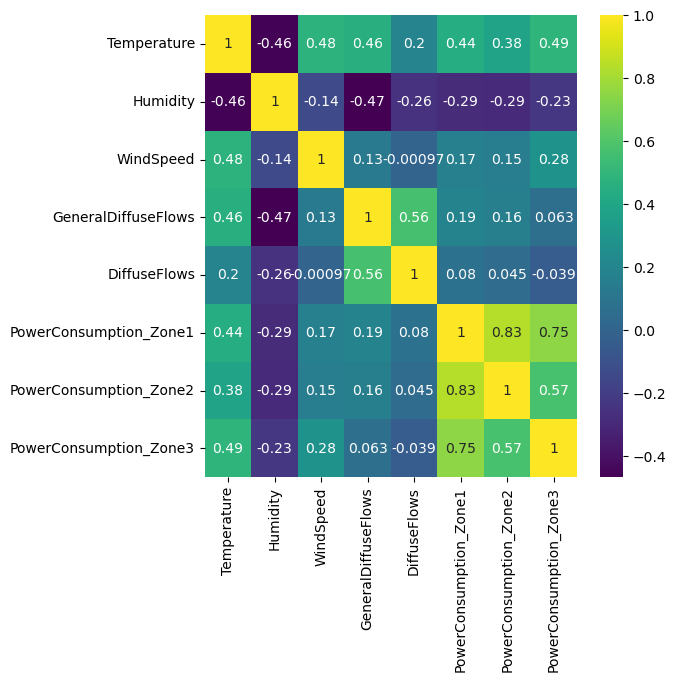

In [243]:
# Data Correlation Matrix 
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True, cmap='viridis' )

In [244]:
# Descriptive Statistics Analysis
print(df.describe())

        Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  52416.000000  52416.000000  52416.000000         52416.000000   
mean      18.810024     68.259518      1.959489           182.696614   
std        5.815476     15.551177      2.348862           264.400960   
min        3.247000     11.340000      0.050000             0.004000   
25%       14.410000     58.310000      0.078000             0.062000   
50%       18.780000     69.860000      0.086000             5.035500   
75%       22.890000     81.400000      4.915000           319.600000   
max       40.010000     94.800000      6.483000          1163.000000   

       DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
count  52416.000000            52416.000000            52416.000000   
mean      75.028022            32344.970564            21042.509082   
std      124.210949             7130.562564             5201.465892   
min        0.011000            13895.696200             8560.081466

It may also be a useful tool to obtain a descriptive statistic summary of the dataset, since all of the columns are numerical. Using ```describe()```, we can obtain the count, mean, std, min, max, etc. of our features.

### Scaling Numerical Data for K-means Clustering

As we are working with the numerical values in our data, it is an important step in preprocessing to scale our data before we apply the K-means Clustering algorithm. This is done to ensure that each of the numerical features have an equal impact on yielding the final result. Otherwise, features with larger magnitudes may have a significantly larger impact on the learning process than others. Let's scale our dataset using the ```StandardScaler()``` from sklearn.preprocessing. The ```StandardScaler()``` transforms each numerical feature in the data to have a mean of 0 and a standard deviation of 1, ensuring that they are all treated equally. 

In [245]:
# Creating StandardScaler() object and scaling numerical columns
scaler = StandardScaler()
df[['Temperature','Humidity','WindSpeed','GeneralDiffuseFlows','DiffuseFlows','PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']] = scaler.fit_transform(df[['Temperature','Humidity','WindSpeed','GeneralDiffuseFlows','DiffuseFlows','PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']])

### Trying K-means Clustering with Several K Values

Now that our data is sufficiently preprocessed for unsupervised learning, let's try using the ```'Temperature'``` and ```'PowerConsumption_Zone1'``` columns from our data to perform K-means Clustering. At first, we'll try a range of K-values to see how the number of clusters affects the final results.

In [246]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['Temperature' , 'PowerConsumption_Zone1']]) 
    df[f'KMeans_{k}'] = kmeans.labels_

C:\Users\grape\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grape\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grape\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grape\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grape\anaconda3\lib\site-packages\sklearn\clust

In [247]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
Datetime,,,,,,,,,,,,,
1/1/2017 0:00,-2.106645,0.356277,-0.798900,-0.690797,-0.603085,0.239917,-0.944672,0.363262,0,0,0,3,0
1/1/2017 0:10,-2.131578,0.401291,-0.798900,-0.690725,-0.603359,-0.354854,-0.320573,0.346669,0,0,1,1,2
1/1/2017 0:20,-2.148946,0.401291,-0.800178,-0.690755,-0.603238,-0.451143,-0.391398,0.276804,0,0,1,1,2
1/1/2017 0:30,-2.181962,0.433443,-0.798900,-0.690646,-0.603270,-0.577254,-0.515516,0.160655,0,0,1,1,2
1/1/2017 0:40,-2.216353,0.478456,-0.799752,-0.690808,-0.603359,-0.702514,-0.609482,0.091663,0,0,1,1,2


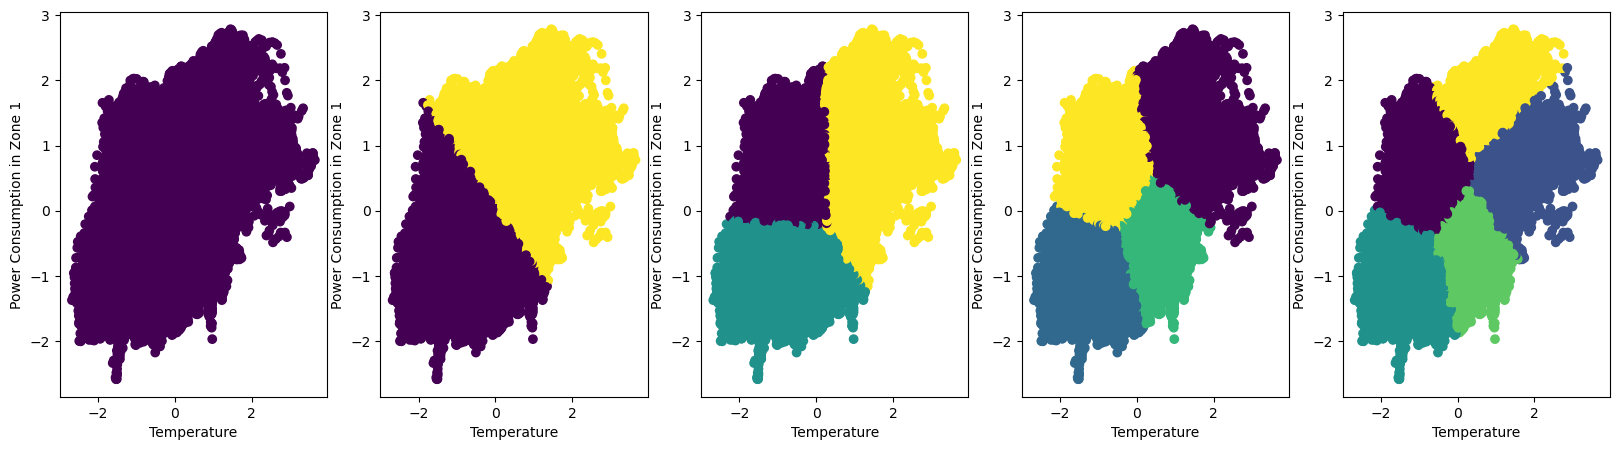

In [248]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['Temperature'], y=df['PowerConsumption_Zone1'], c=df[f'KMeans_{i}'])
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Power Consumption in Zone 1')  

### How do I know what K to choose?

Now, let's optimize the number of clusters to best describe our dataset features. We will be doing so with the "elbow" method, which is the most commonly implemented. Take a look at the function below: 

In [249]:
def optimize_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        print(means)
        print(inertias)
        
    plt.figure(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.title('Finding optimal K-Means clusters using Elbow method')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Distance (WSSD)')
    plt.show()

Performing the optimized K-value search on the ```'Temperature'``` and ```'PowerConsumption_Zone1'``` columns, that we used for our clustering algorithm above...

[1]
[104831.99999999991]
[1, 2]
[104831.99999999991, 54953.37819413541]
[1, 2, 3]
[104831.99999999991, 54953.37819413541, 39865.55893930396]
[1, 2, 3, 4]
[104831.99999999991, 54953.37819413541, 39865.55893930396, 27991.447622892534]
[1, 2, 3, 4, 5]
[104831.99999999991, 54953.37819413541, 39865.55893930396, 27991.447622892534, 23124.88404419132]
[1, 2, 3, 4, 5, 6]
[104831.99999999991, 54953.37819413541, 39865.55893930396, 27991.447622892534, 23124.88404419132, 18935.70359350734]
[1, 2, 3, 4, 5, 6, 7]
[104831.99999999991, 54953.37819413541, 39865.55893930396, 27991.447622892534, 23124.88404419132, 18935.70359350734, 16890.53410385736]
[1, 2, 3, 4, 5, 6, 7, 8]
[104831.99999999991, 54953.37819413541, 39865.55893930396, 27991.447622892534, 23124.88404419132, 18935.70359350734, 16890.53410385736, 13716.217566727624]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[104831.99999999991, 54953.37819413541, 39865.55893930396, 27991.447622892534, 23124.88404419132, 18935.70359350734, 16890.53410385736, 13716.21756672

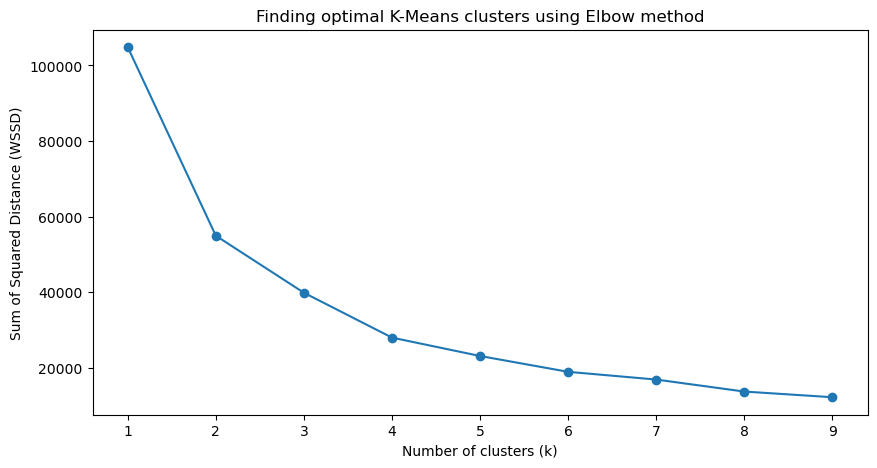

In [250]:
optimize_k_means(df[['Temperature' , 'PowerConsumption_Zone1']],10)

It appears that our "elbow point" (when the WSSD curve starts to flatten out) occurs at around k=2 or k=3. That means the ideal number of clusters to fit the ```'Temperature'``` and ```'PowerConsumption_Zone1'``` columns is 2 or 3. Let's use this k-value to recluster the data!

In [251]:
kmeans= KMeans(n_clusters=3)

kmeans.fit(df[['Temperature' , 'PowerConsumption_Zone1']])

# Adds a new column, which represents its cluster assignments.
df['kmeans_3'] = kmeans.labels_
df.head()

C:\Users\grape\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,kmeans_3
Datetime,,,,,,,,,,,,,,
1/1/2017 0:00,-2.106645,0.356277,-0.798900,-0.690797,-0.603085,0.239917,-0.944672,0.363262,0,0,0,3,0,2
1/1/2017 0:10,-2.131578,0.401291,-0.798900,-0.690725,-0.603359,-0.354854,-0.320573,0.346669,0,0,1,1,2,1
1/1/2017 0:20,-2.148946,0.401291,-0.800178,-0.690755,-0.603238,-0.451143,-0.391398,0.276804,0,0,1,1,2,1
1/1/2017 0:30,-2.181962,0.433443,-0.798900,-0.690646,-0.603270,-0.577254,-0.515516,0.160655,0,0,1,1,2,1
1/1/2017 0:40,-2.216353,0.478456,-0.799752,-0.690808,-0.603359,-0.702514,-0.609482,0.091663,0,0,1,1,2,1


In [252]:
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(np.unique(cluster_labels))
print(centroids)

[0 1 2]
[[ 1.04791383  0.64756348]
 [-0.60818502 -1.02149992]
 [-0.53283234  0.58352199]]


We can see the three distinct clusters and the locations of each of their respective centroids. Let's create a visualization of this by plotting the cluster distribution amongst the data and the centroid location for each respective cluster...

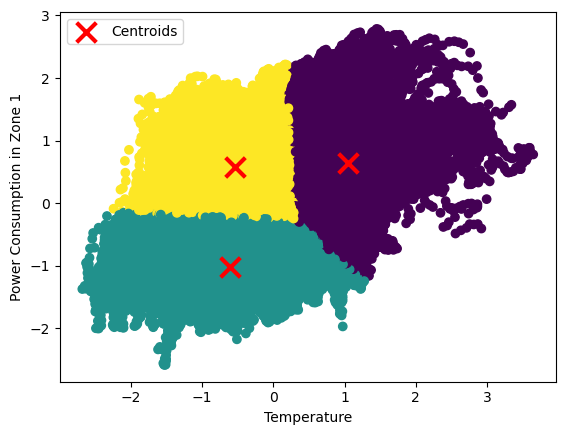

In [253]:
# Cluster Plotting
plt.scatter(x=df['Temperature'], y=df['PowerConsumption_Zone1'], c=df['kmeans_3'])
plt.xlabel('Temperature')
plt.ylabel('Power Consumption in Zone 1')  

# Centroid Plotting
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroids')
plt.legend()
plt.show()

Despite not being given a target to predict, the K-means Clustering algorithm has learned the patterns from our data! This shows how the principles of unsupervised learning can be used to conduct meaningful analyses on any data.

### Your turn!

This time, using what you've learned above, try implementing the K-means Clustering algorithm on your own!

#### Step 1: Select your columns

In this activity, we want you to use the ```'DiffuseFlows'``` and ```'PowerConsumption_Zone3'``` columns for clustering.

In [254]:
df = df[['DiffuseFlows','PowerConsumption_Zone3']]

#### Step 2: Optimized K Search using Elbow Method

Use the ```optimize_k_means()``` function created above to find the optimal number of clusters for these columns.

In [255]:
# # Answer Key - Uncomment code below to see results!

# optimize_k_means(df[['DiffuseFlows' , 'PowerConsumption_Zone3']],10)

#### Step 3: Perform K-means Clustering with Optimal Clusters

Perform the actual clustering algorithm with the k-value found in step 2 and visualize the results (cluster labels + centroids).

In [256]:
# # Answer Key - Uncomment code below to see results!

# kmeans= KMeans(n_clusters=3)

# kmeans.fit(df[['DiffuseFlows' , 'PowerConsumption_Zone3']])

# # Adds a new column, which represents its cluster assignments.
# df['kmeans_3'] = kmeans.labels_
# # df.head()

# cluster_labels = kmeans.labels_
# centroids = kmeans.cluster_centers_

# # Cluster Plotting
# plt.scatter(x=df['DiffuseFlows'], y=df['PowerConsumption_Zone3'], c=df['kmeans_3'])
# plt.xlabel('Diffuse Flows')
# plt.ylabel('Power Consumption in Zone 3')  

# # Centroid Plotting
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroids')
# plt.legend()
# plt.show()